# Predictive Ordering: Prophet

---
This notebook contains the code to forcast order quantities using the Merlion python library for time series intelligence.

---

## Reading the Data

Installing Prophet

In [98]:
!pip install prophet

Importing the required libraries

In [99]:
import pandas as pd
from google.colab import drive
import math
import io
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

Reading the csv file from Google Drive

In [100]:
drive.mount("/content/gdrive")

df = pd.read_csv("gdrive/My Drive/PreprocessedOrders.csv", index_col="Period")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Visualizing the Dataset

Display the dataset

In [101]:
df.head()

,Unnamed: 0,Sales1,Sales2,Sales3,Sales4,Sales5,Sales6
Period,,,,,,,
0,0,30,62,61,62,6,21
1,1,23,65,72,67,28,11
2,2,25,73,69,76,19,24
3,3,31,67,70,69,19,18
4,4,20,53,59,64,29,13


In [102]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

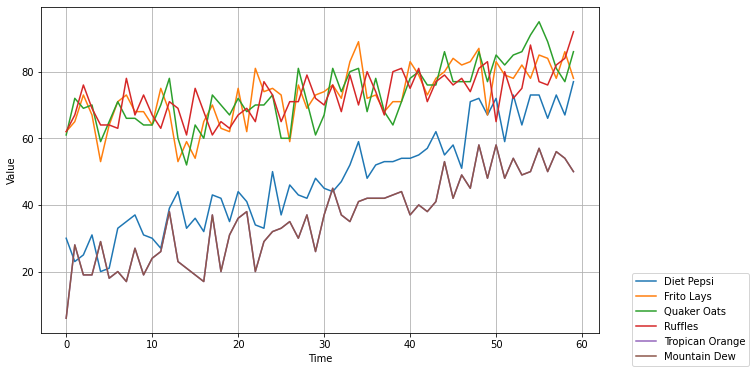

In [103]:
shortProductNames = ["Diet Pepsi", "Frito Lays", "Quaker Oats", "Ruffles", "Tropican Orange", "Mountain Dew"]
plt.figure(figsize=(10, 6))
plot_series(np.arange(len(df[["Sales1", "Sales2", "Sales3", "Sales4", "Sales5", "Sales5"]]), dtype="float32"), df[["Sales1", "Sales2", "Sales3", "Sales4", "Sales5", "Sales5"]])
plt.legend(shortProductNames, loc="upper left", bbox_to_anchor=(1.05, 0.0, 0.3, 0.2))
plt.show()

## Preparing the dataset

In [104]:
df.head()

,Unnamed: 0,Sales1,Sales2,Sales3,Sales4,Sales5,Sales6
Period,,,,,,,
0,0,30,62,61,62,6,21
1,1,23,65,72,67,28,11
2,2,25,73,69,76,19,24
3,3,31,67,70,69,19,18
4,4,20,53,59,64,29,13


Create a date stamp column

In [105]:
date = pd.date_range(start="2000-1-1", periods=60, freq="1M")
df = df.assign(ds=date)

Display the dataframe

In [106]:
df.drop(["Unnamed: 0"], axis = 1, inplace=True)
df.head()

,Sales1,Sales2,Sales3,Sales4,Sales5,Sales6,ds
Period,,,,,,,
0,30,62,61,62,6,21,2000-01-31
1,23,65,72,67,28,11,2000-02-29
2,25,73,69,76,19,24,2000-03-31
3,31,67,70,69,19,18,2000-04-30
4,20,53,59,64,29,13,2000-05-31


## Training the model

In [107]:
final = pd.DataFrame()

df_train = df[:40]
df_test = df[40:]

for column in df.columns:
  if column != "ds":
    model = Prophet()
    temp = pd.DataFrame()
    temp["ds"] = df_train["ds"]
    temp["y"] = df_train[column]
  
    model.fit(temp)
    future = model.make_future_dataframe(periods=20)
    forecast = model.predict(future)
    forecast = forecast.rename(columns={"yhat": "yhat_"+ column})
    final = pd.merge(final, forecast.set_index("ds"), how="outer", left_index=True, right_index=True)

final = final[["yhat_Sales1", "yhat_Sales2", "yhat_Sales3", "yhat_Sales4", "yhat_Sales5", "yhat_Sales6"]]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yhat_upper_x', 'trend_x', 'additive_terms_x',

In [108]:
final.shape

(60, 6)

##Visualizing the results

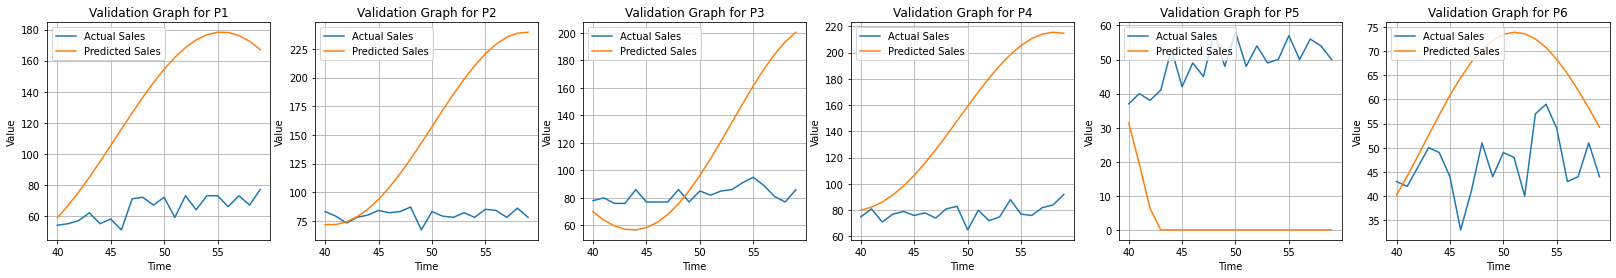

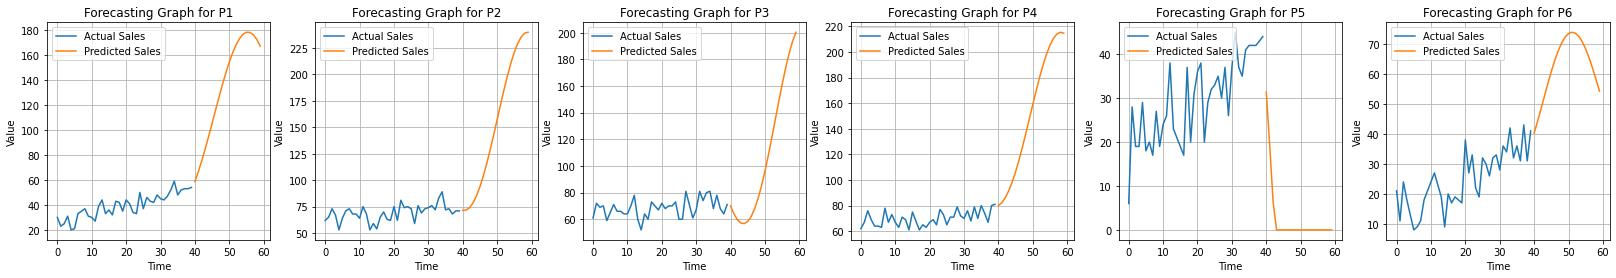

In [109]:
plt.figure(figsize=(28, 4))
df_test = df_test.drop(['ds'], axis = 1)
test_dataset = df_test.to_numpy()
train_dataset = df_train.to_numpy()
result = final.to_numpy()[40:]
result = np.clip(result, 0, 10000)
time = np.arange(60)
time_train = time[:40]
time_validate = time[40:]

products = 6
for product in range(products):
  plt.subplot(1, 6, product+1)
  plot_series(time_validate, test_dataset[:, product])
  plot_series(time_validate, result[:, product])
  plt.title("Validation Graph for P%d" %(product + 1))
  plt.legend(["Actual Sales", "Predicted Sales"], loc ="upper left")
plt.show()

plt.figure(figsize=(28, 4))
for product in range(products):
  plt.subplot(1, 6, product+1)
  plot_series(time_train, train_dataset[:, product])
  plot_series(time_validate, result[:, product])
  plt.title("Forecasting Graph for P%d" %(product + 1))
  plt.legend(["Actual Sales", "Predicted Sales"], loc ="upper left")
plt.show()

In [110]:
df.to_numpy().shape

(60, 7)

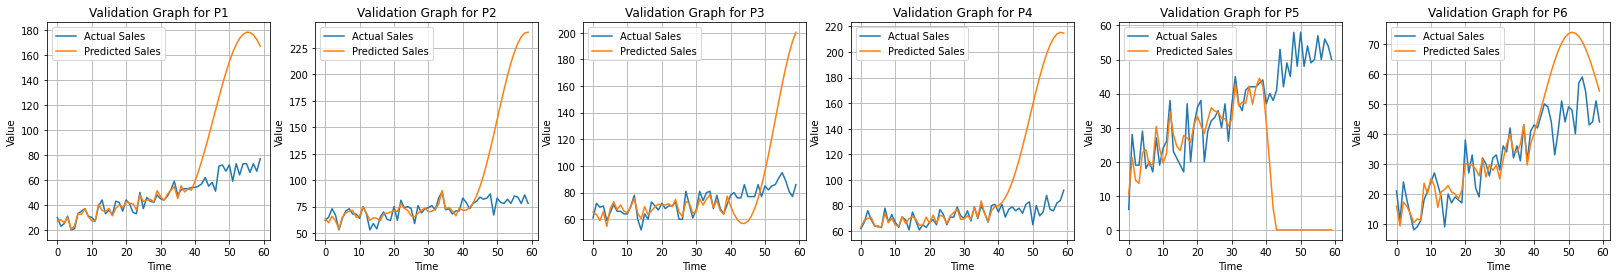

In [111]:
plt.figure(figsize=(28, 4))
# df_test = df_test.drop(['ds'], axis = 1)
test_dataset = df_test.to_numpy()
train_dataset = df_train.to_numpy()
result = final.to_numpy()
result = np.clip(result, 0, 10000)
time = np.arange(60)
time_train = time[:40]
time_validate = time[40:]

products = 6
for product in range(products):
  plt.subplot(1, 6, product+1)
  plot_series(time, df.to_numpy()[:, product])
  plot_series(time, result[:, product])
  plt.title("Validation Graph for P%d" %(product + 1))
  plt.legend(["Actual Sales", "Predicted Sales"], loc ="upper left")
plt.show()

## Calculating the metrics

In [112]:
def SMAPE(actual, predicted):
  (rows, cols) = actual.shape
  updated_actual = actual
  updated_predicted = predicted

  model_error = 0

  for row in range(rows):
    for col in range(cols):
      if actual[row][col] == predicted[row][col] and actual[row][col] == 0:
          updated_actual[row][col] = 1
          updated_predicted[row][col] = 1
    
  for col in range(cols):
    model_error = model_error + round(np.mean(np.abs(updated_predicted[:, col] - updated_actual[:, col]) / ((np.abs(updated_predicted[:, col]) + np.abs(updated_actual[:, col]))/2))*100, 2)
  return model_error/cols

In [113]:
smape = SMAPE (test_dataset, result[40:])
print(smape)

70.69000000000001
